# Example of use of the module `doe`

We can import the routine using `import doe`. Note that the file `doe.py` must be in the same directory than your code. Note that we also need the module `numpy`.

In [18]:
import doe
import numpy as np

We can create our first model matrix by hand, or using `doe.model_matrix(name, factors)`.

In [19]:
modelspec = doe.model_matrix(name="interaction", factors=3)
print("Model matrix =\n", modelspec)

Model matrix =
 [[0 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 0]]


Let's now use this model to fit the following data, stored in two `numpy` arrays called `X` and `y`. In this example, suppose that the true model is $y=1+x_1-x_2x_3$. To make things more interesting, we will add some noise to the responses.

In [20]:
X = np.array([
    [3, 1, 0],
    [2, 1, 1],
    [3, 3, 1],
    [1, 2, 0],
    [0, 1, 3],
    [5, 7, 1],
    [4, 3, 3],
    [6, 2, 3],
])

y = 1 + X[:, 0] - X[:, 1] * X[:, 2] + np.random.normal(0, 0.01, size=X.shape[0])

print("X =\n", X)

print("y =\n", y)

X =
 [[3 1 0]
 [2 1 1]
 [3 3 1]
 [1 2 0]
 [0 1 3]
 [5 7 1]
 [4 3 3]
 [6 2 3]]
y =
 [ 4.01442599  1.99493521  1.00032504  1.99384754 -2.01087507 -0.99427132
 -4.00583246  1.00652027]


We can now use `fitlm(X, y, model)` to fit the model to the data. The function returns an object of class `LinearModel`. We can check its properties such as the coefficients by using `model.coefficients`.

In [22]:
model = doe.fitlm(X=X, y=y, modelspec=modelspec)
coefficients_name = ["a_0", "a_1", "a_2", "a_3", "a_12", "a_13", "a_23"]
print("Coefficients :")
for coefficient, name in zip(model.coefficients, coefficients_name):
    print(f"{name} = {coefficient:.3f}")

Coefficients :
a_0 = 0.987
a_1 = 1.009
a_2 = -0.002
a_3 = 0.002
a_12 = -1.001
a_13 = -0.002
a_23 = 0.000


We can now check how good our model is. One method we can use is compare the true responses `y` with predictions made using `LinearModel.predict(X)` and plot the results using the library `matplotlib.pyplot`. The closer the points are to the line $y=x$, the better the model. Another way would be to compute the root mean square error (RMSE) of the model.

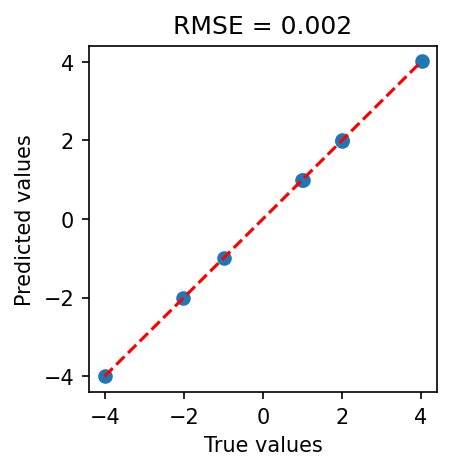

In [23]:
import matplotlib.pyplot as plt

y_pred = model.predict(X=X)
rmse = np.sqrt(np.mean((y - y_pred) ** 2))

plt.figure(figsize=(3, 3), dpi=150)
plt.title(f"RMSE = {rmse:.3f}")
plt.scatter(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

Let's now consider new data that won't suit the model. For example, suppose that the true model has linear terms $y=1+x_1-x_2x_3+x_1^2$.

In [37]:
X = np.array([
    [3, 1, 0],
    [2, 1, 1],
    [3, 3, 1],
    [1, 2, 0],
    [0, 1, 3],
    [5, 7, 1],
    [4, 3, 3],
    [6, 2, 3],
])

y = 1 + X[:, 0] - X[:, 1] * X[:, 2] + X[:, 0]**2 + np.random.normal(0, 0.01, size=X.shape[0])

print("X =\n", X)

print("y =\n", y)

X =
 [[3 1 0]
 [2 1 1]
 [3 3 1]
 [1 2 0]
 [0 1 3]
 [5 7 1]
 [4 3 3]
 [6 2 3]]
y =
 [13.00211899  5.99685861  9.99556046  3.00068153 -2.00443757 24.00419642
 12.00709631 36.99576182]


As before, let's try fit the model and print the coefficients.

In [38]:
model = doe.fitlm(X=X, y=y, modelspec=modelspec)
coefficients_name = ["a_0", "a_1", "a_2", "a_3", "a_12", "a_13", "a_23"]
print("Coefficients :")
for coefficient, name in zip(model.coefficients, coefficients_name):
    print(f"{name} = {coefficient:.3f}")

Coefficients :
a_0 = -2.295
a_1 = 4.100
a_2 = -0.602
a_3 = 3.466
a_12 = -3.411
a_13 = 0.930
a_23 = 0.735


Plotting the predictions against the true responses, we can see that the model is not so good. The RMSE is also much higher than before.

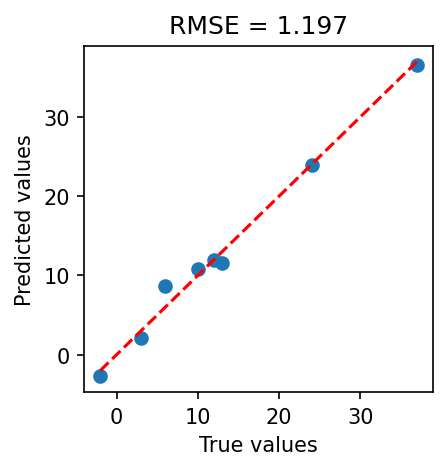

In [39]:
import matplotlib.pyplot as plt

y_pred = model.predict(X=X)
rmse = np.sqrt(np.mean((y - y_pred) ** 2))

plt.figure(figsize=(3, 3), dpi=150)
plt.title(f"RMSE = {rmse:.3f}")
plt.scatter(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()